# Scikit

In [1]:
%pylab inline
import pylab
from sklearn.datasets import fetch_mldata
DATA_PATH = '~/data'
mnist = fetch_mldata('MNIST original', data_home=DATA_PATH)

Populating the interactive namespace from numpy and matplotlib


## MNIST

### MNIST Data

In [2]:
mnist.data.shape

(70000, 784)

In [3]:
row = mnist.data[0,:] # First row of the array
col = mnist.data[:,0] # First column of the array

print row.shape
print col.shape

(784,)
(70000,)


In [4]:
print row.sum(), row.max(), row.min()
print col.sum(), col.max(), col.min()

31095 255 0
0 0 0


In [5]:
print mnist.data[:10,:] # First ten rows
print mnist.data[:,-10:] # Last ten columns

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [6]:
train = mnist.data[:60000]

In [7]:
test = mnist.data[60000:]

In [8]:
test_sample = test[::100]
test_sample[:,299].mean()

88.819999999999993

## Visualizing Image Data

In [10]:
img = mnist.data[0]
print img

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 253 167   

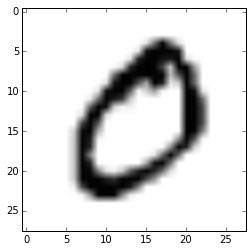

In [11]:
pylab.imshow(img.reshape(28, 28), cmap="Greys")

### DIY 1

* Use `imshow` to visualize a number of images from `sample`.  What can you say about how the data set is ordered?

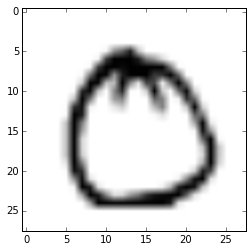

In [18]:
img1 = mnist.data[1000]
pylab.imshow(img1.reshape(28, 28), cmap="Greys")

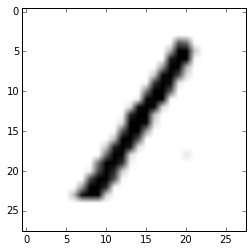

In [19]:
img2 = mnist.data[10000]
pylab.imshow(img2.reshape(28, 28), cmap="Greys")

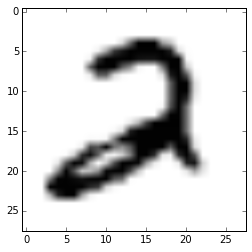

In [20]:
img3 = mnist.data[15000]
pylab.imshow(img3.reshape(28, 28), cmap="Greys")

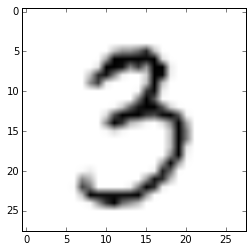

In [21]:
img4 = mnist.data[20000]
pylab.imshow(img4.reshape(28, 28), cmap="Greys")

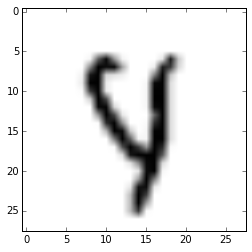

In [22]:
img5 = mnist.data[25000]
pylab.imshow(img5.reshape(28, 28), cmap="Greys")

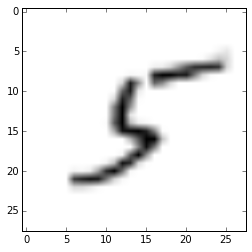

In [23]:
img6 = mnist.data[35000]
pylab.imshow(img6.reshape(28, 28), cmap="Greys")

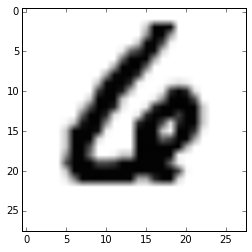

In [24]:
img7 = mnist.data[40000]
pylab.imshow(img7.reshape(28, 28), cmap="Greys")

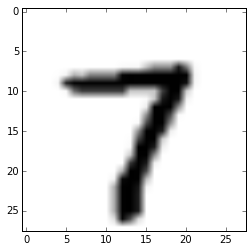

In [25]:
img8 = mnist.data[46000]
pylab.imshow(img8.reshape(28, 28), cmap="Greys")

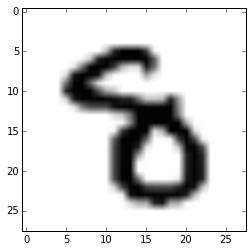

In [26]:
img9 = mnist.data[50000]
pylab.imshow(img9.reshape(28, 28), cmap="Greys")

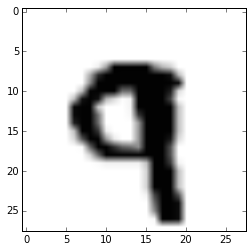

In [27]:
img10 = mnist.data[55000]
pylab.imshow(img10.reshape(28, 28), cmap="Greys")

The order is 0,1,2,3,4,5,6,7,8,9.

## Unsupervised KNN

In [28]:
%%time
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute').fit(train)

CPU times: user 16.4 ms, sys: 19.3 ms, total: 35.6 ms
Wall time: 551 ms


In [29]:
%%time
query_img = test[9000]
_, result = model.kneighbors(query_img, n_neighbors=4)

CPU times: user 231 ms, sys: 160 ms, total: 391 ms
Wall time: 366 ms


In [30]:
print result

[[56814 25140 55592 56094]]


In [31]:
# Display several images in a row
def show(imgs, n=1):
    fig = pylab.figure()
    for i in xrange(0, n):
        fig.add_subplot(1, n, i+1, xticklabels=[], yticklabels=[])
        if n == 1:
            img = imgs
        else:
            img = imgs[i]
        pylab.imshow(img.reshape(28, 28), cmap="Greys")

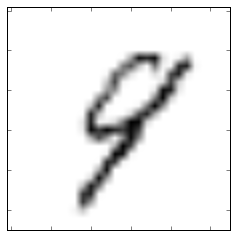

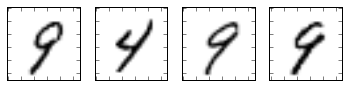

In [32]:
show(query_img)
show(train[result[0],:], len(result[0]))

### DIY 2

* Use the nearest neighbors model to inspect results for other images in the test set.  Do all of the digits seem to perform as well as "0" does?

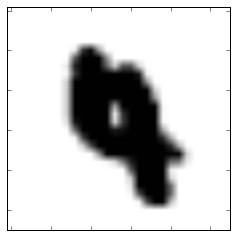

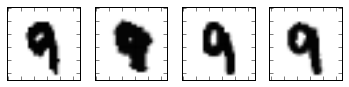

In [33]:
query_img1 = test[5000]
_, result1 = model.kneighbors(query_img1, n_neighbors=4)
show(query_img1)
show(train[result1[0],:], len(result1[0]))

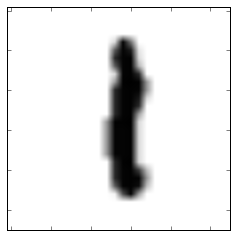

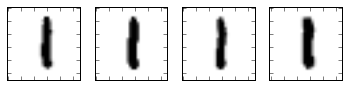

In [34]:
query_img2 = test[1500]
_, result2 = model.kneighbors(query_img2, n_neighbors=4)
show(query_img2)
show(train[result2[0],:], len(result2[0]))

Some digits may perform as well as '0', such as '4' and '9'.

## KNN Classification

In [35]:
train_labels = mnist.target[:60000]
test_labels = mnist.target[60000:]
test_labels_sample = test_labels[::100]

In [36]:
%%time
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4, algorithm='brute').fit(train, train_labels)

CPU times: user 7.24 ms, sys: 3.77 ms, total: 11 ms
Wall time: 9.73 ms


## Analysis of classification

In [37]:
%%time
# Score the model!
model.score(test_sample, test_labels_sample)

CPU times: user 895 ms, sys: 206 ms, total: 1.1 s
Wall time: 706 ms


0.96999999999999997

(100, 784)


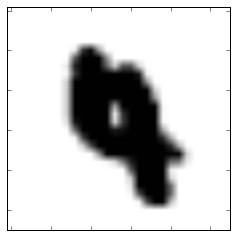

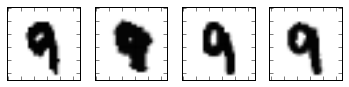

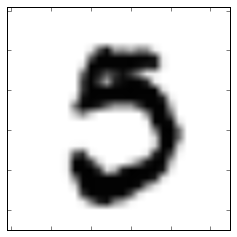

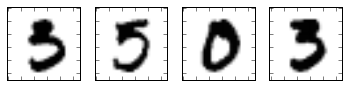

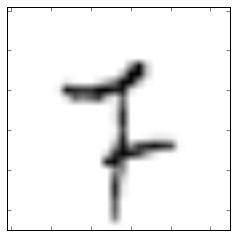

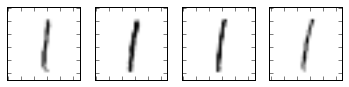

In [38]:
preds = model.predict(test_sample)
print test_sample.shape
errors = [i for i in xrange(0, len(test_sample)) if preds[i] != test_labels_sample[i]]

for i in errors:
    query_img = test_sample[i]
    _, result = model.kneighbors(query_img, n_neighbors=4)
    show(query_img)
    show(train[result[0],:], len(result[0]))

In [39]:
preds = model.predict(test_sample)
errors = [i for i in xrange(0, len(test_sample)) if preds[i] != test_labels_sample[i]]
err_rate = float(len(errors))/len(preds)
print err_rate

0.03


### DIY 3

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
train = mnist.data[:60000]
train_labels = mnist.target[:60000]

test = mnist.data[60000:]
test_labels = mnist.target[60000:]

# For traning
train_sample = train[::100]
train_sample_labels = train_labels[::100]
# for testing
test_sample = test[::10]
test_sample_labels = test_labels[::10]

#### Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB().fit(train_sample,train_sample_labels)
preds2 = model2.predict(test_sample)
errors2 = [i for i in xrange(0, len(test_sample)) if preds2[i] != test_sample_labels[i]]
err_rate2 = float(len(errors2))/len(preds2)
print err_rate2

0.172


In [43]:
confusion_matrix(test_sample_labels, preds2)

array([[ 95,   0,   0,   0,   0,   0,   2,   0,   1,   0],
       [  0, 111,   0,   0,   0,   0,   1,   0,   2,   0],
       [  2,   2,  83,   6,   1,   0,   2,   2,   2,   3],
       [  1,   0,   8,  75,   0,   2,   2,   3,   4,   6],
       [  0,   0,   2,   0,  76,   0,   4,   0,   4,  12],
       [  0,   0,   3,  16,   1,  57,   2,   0,   9,   2],
       [  0,   0,   1,   0,   1,   1,  89,   0,   3,   0],
       [  1,   0,   2,   2,   1,   0,   0,  85,   3,   9],
       [  1,   2,   1,   4,   1,   3,   2,   1,  81,   2],
       [  2,   1,   0,   1,  12,   1,   0,   2,   5,  76]])

The pairs of digits most frequently confused with each other is 3 and 5.

In [44]:
from sklearn import svm
model3 = svm.SVC(kernel='linear').fit(train_sample,train_sample_labels)
preds3 = model3.predict(test_sample)
errors3 = [i for i in xrange(0, len(test_sample)) if preds3[i] != test_sample_labels[i]]
err_rate3 = float(len(errors3))/len(preds3)
print err_rate3

0.127


In [45]:
confusion_matrix(test_sample_labels, preds3)

array([[ 95,   0,   0,   0,   0,   0,   3,   0,   0,   0],
       [  0, 112,   0,   0,   0,   1,   1,   0,   0,   0],
       [  2,   2,  88,   1,   1,   0,   2,   6,   1,   0],
       [  0,   1,   6,  80,   1,   4,   0,   3,   2,   4],
       [  0,   2,   0,   0,  88,   0,   4,   0,   0,   4],
       [  0,   1,   1,   4,   1,  77,   3,   0,   3,   0],
       [  1,   0,   1,   0,   5,   2,  86,   0,   0,   0],
       [  0,   1,   6,   0,   1,   0,   0,  91,   0,   4],
       [  2,   1,   1,   3,   4,   5,   2,   1,  79,   0],
       [  2,   1,   0,   4,  10,   0,   1,   4,   1,  77]])

The pairs of digits most frequently confused with each other is 4 and 9.

In [46]:
from sklearn import tree
model4 = tree.DecisionTreeClassifier().fit(train_sample,train_sample_labels)
preds4 = model3.predict(test_sample)
errors4 = [i for i in xrange(0, len(test_sample)) if preds4[i] != test_sample_labels[i]]
err_rate4 = float(len(errors4))/len(preds4)
print err_rate4

0.127


In [47]:
confusion_matrix(test_sample_labels, preds4)

array([[ 95,   0,   0,   0,   0,   0,   3,   0,   0,   0],
       [  0, 112,   0,   0,   0,   1,   1,   0,   0,   0],
       [  2,   2,  88,   1,   1,   0,   2,   6,   1,   0],
       [  0,   1,   6,  80,   1,   4,   0,   3,   2,   4],
       [  0,   2,   0,   0,  88,   0,   4,   0,   0,   4],
       [  0,   1,   1,   4,   1,  77,   3,   0,   3,   0],
       [  1,   0,   1,   0,   5,   2,  86,   0,   0,   0],
       [  0,   1,   6,   0,   1,   0,   0,  91,   0,   4],
       [  2,   1,   1,   3,   4,   5,   2,   1,  79,   0],
       [  2,   1,   0,   4,  10,   0,   1,   4,   1,  77]])

The pairs of digits most frequently confused with each other is 4 and 9.